In [1]:
%matplotlib inline

import yt
import cgs as cgs
import numpy as np
import matplotlib.pyplot as plt

import dwarf as dw
import copy

using cgs py


In [19]:
string = string = "best alpha  = %.4f - best beta = %.4f\n"%(1,2)

outfile = open('outfiasdfle.dat','w')
outfile.write('shock\n')
outfile.write(string)

In [2]:
yt.funcs.mylog.setLevel(99999999)


In [3]:
sim_nosne = dw.simulation('dwarf_fullp_hdf5',ds_dir='./../../flash_runs/carina_final/lowres_nosne/',reload_times=False)


DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
DWARF ANALYSIS : [INIT] Did not find parameter: particleFileIntervalTime
DWARF ANALYSIS : [INIT] Looking for supernova files
DWARF ANALYSIS : [INIT] No supernova feedback file found at ./../../flash_runs/carina_final/lowres_nosne/SNfeedback.dat
DWARF ANALYSIS : [INIT] No SB feedback file found at ./../../flash_runs/carina_final/lowres_nosne/SBfeedback.dat


In [4]:
sim_sne   = dw.simulation('dwarf_fullp_hdf5',ds_dir='./../../flash_runs/carina_final/lowres/',reload_times=True)

DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
DWARF ANALYSIS : [INIT] Did not find parameter: particleFileIntervalTime
DWARF ANALYSIS : [INIT] Looking for supernova files
DWARF ANALYSIS : trying to set units in supernova
DWARF ANALYSIS : [INIT] No SB feedback file found at ./../../flash_runs/carina_final/lowres/SBfeedback.dat


In [5]:
sim_ad    = dw.simulation('dwarf_fullp_hdf5',ds_dir='./../../flash_runs/carina_adiabatic/',reload_times=False)

DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
DWARF ANALYSIS : [INIT] Did not find parameter: particleFileIntervalTime
DWARF ANALYSIS : [INIT] Looking for supernova files
DWARF ANALYSIS : [INIT] No supernova feedback file found at ./../../flash_runs/carina_adiabatic/SNfeedback.dat
DWARF ANALYSIS : [INIT] No SB feedback file found at ./../../flash_runs/carina_adiabatic/SBfeedback.dat


In [6]:
print "here"

here


In [7]:
len(sim_sne.plt_list)

514

In [8]:
ds_selection = [0,40,80,120,160,200,240,280,320]
dw.profile_1D(sim_sne,'radius','density', 20, ds_selection=ds_selection)
dw.profile_1D(sim_nosne,'radius','density', 20, ds_selection=ds_selection)
dw.profile_1D(sim_ad,'radius','density', 20, ds_selection=ds_selection)

In [9]:
sim_list   = [sim_sne, sim_nosne, sim_ad]
dens_list  = [None]*3
times_list = [None]*3
r_list = [None]*3
i = 0
for s in sim_list:
    dens_list[i] = copy.deepcopy(s.profiles['radius']['density'])
    times_list[i] = copy.deepcopy(s.profile_times)
    r_list[i] = copy.deepcopy(s.profile_bins['radius'])
    
    dens_list[i] = [x for x in dens_list[i] if x is not None]
    times_list[i] = [x for x in times_list[i] if x is not None]
    
    r_list[i] = r_list[i].convert_to_units('pc').value
    for j in np.arange(len(dens_list[i])):
        dens_list[i][j] = dens_list[i][j].value
        times_list[i][j] = times_list[i][j].value
        
    i = i + 1



27


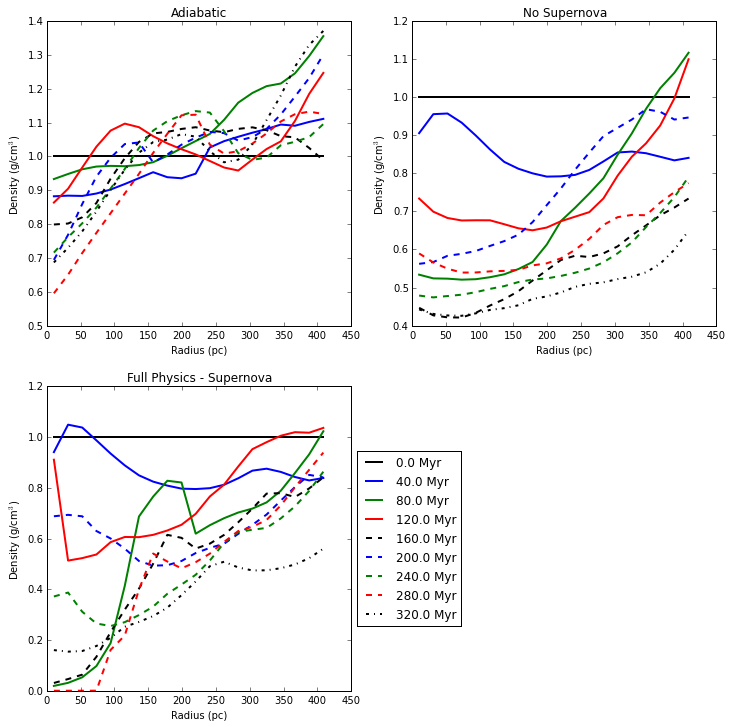

In [11]:
fig = plt.figure(figsize=[12,12])
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

colors = ['black','blue','green','red']*3
ls     = ['-']*4  + ['--']*4 + ['-.']*4

print np.size(times_list)
for i in np.arange(9):
    ax3.plot(r_list[0], dens_list[0][i]/dens_list[0][0], lw=2, label="%.1f Myr"%(times_list[0][i]),color=colors[i],ls=ls[i])
    ax2.plot(r_list[1], dens_list[1][i]/dens_list[1][0], lw=2, label="%.1f Myr"%(times_list[1][i]),color=colors[i],ls=ls[i])
    ax1.plot(r_list[2], dens_list[2][i]/dens_list[2][0], lw=2, label="%.1f Myr"%(times_list[2][i]),color=colors[i],ls=ls[i])

ax3.set_title('Full Physics - Supernova')
ax2.set_title('No Supernova')
ax1.set_title('Adiabatic')
#ax1.semilogy(); ax2.semilogy(); ax3.semilogy()
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for a in [ax1,ax2,ax3]:
    a.set_ylabel(r'Density (g/cm$^{3}$)')
    a.set_xlabel(r'Radius (pc)')
    #a.set_ylim(1.0E-26,1.0E-24)

fig.savefig('carina_simulation_density_profiles.png')

In [12]:
ds_selection = [0,20,40,60,80,100,120,140,160,180,200]
dw.profile_1D(sim_sne,'radius','temperature', 20, ds_selection=ds_selection)
dw.profile_1D(sim_nosne,'radius','temperature', 20, ds_selection=ds_selection)
dw.profile_1D(sim_ad,'radius','temperature', 20, ds_selection=ds_selection)

In [13]:
sim_list   = [sim_sne, sim_nosne, sim_ad]
temp_list  = [None]*3
times_list = [None]*3
r_list = [None]*3
i = 0
for s in sim_list:
    temp_list[i] = copy.deepcopy(s.profiles['radius']['temperature'])
    times_list[i] = copy.deepcopy(s.profile_times)
    r_list[i] = copy.deepcopy(s.profile_bins['radius'])
    
    temp_list[i] = [x for x in temp_list[i] if x is not None]
    times_list[i] = [x for x in times_list[i] if x is not None]
    
    r_list[i] = r_list[i].convert_to_units('pc').value
    for j in np.arange(len(dens_list[i])):
        temp_list[i][j] = temp_list[i][j].value
        times_list[i][j] = times_list[i][j].value
        
    i = i + 1



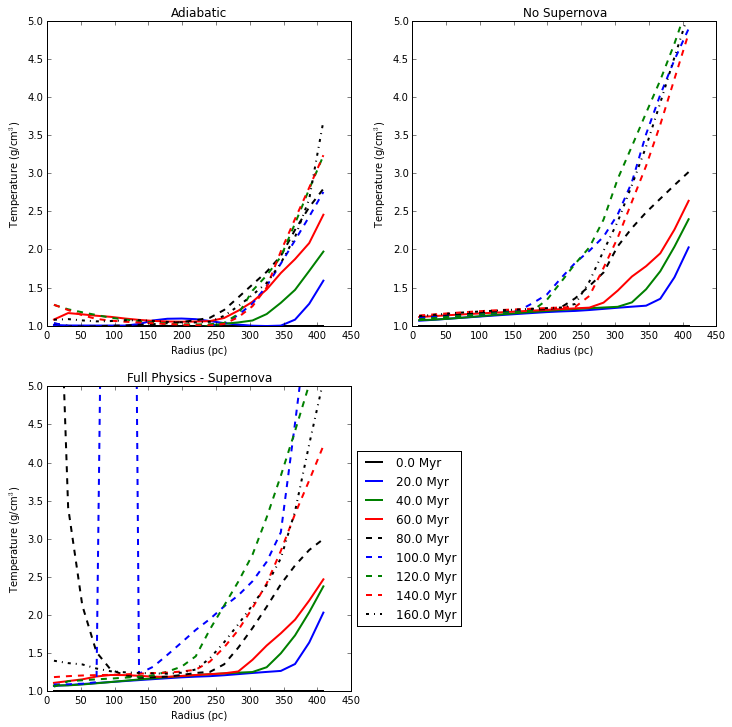

In [16]:
fig = plt.figure(figsize=[12,12])
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

colors = ['black','blue','green','red']*3
ls     = ['-']*4  + ['--']*4 + ['-.']*4

for i in np.arange(9):
    ax3.plot(r_list[0], temp_list[0][i]/temp_list[0][0], lw=2, label="%.1f Myr"%(times_list[0][i]),color=colors[i],ls=ls[i])
    ax2.plot(r_list[1], temp_list[1][i]/temp_list[1][0], lw=2, label="%.1f Myr"%(times_list[1][i]),color=colors[i],ls=ls[i])
    ax1.plot(r_list[2], temp_list[2][i]/temp_list[2][0], lw=2, label="%.1f Myr"%(times_list[2][i]),color=colors[i],ls=ls[i])

ax3.set_title('Full Physics - Supernova')
ax2.set_title('No Supernova')
ax1.set_title('Adiabatic')
#ax1.semilogy(); ax2.semilogy(); ax3.semilogy()
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for a in [ax1,ax2,ax3]:
    a.set_ylabel(r'Temperature (g/cm$^{3}$)')
    a.set_xlabel(r'Radius (pc)')
    a.set_ylim(1,5)
    
fig.savefig('carina_simulation_temperature_profiles.png')